#  Concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import numpy as np

In [2]:
raw_data = pd.read_csv("https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv", skiprows = 54, sep=r'\s*,\s*', engine='python')

Les données ont été extraites le 11/05/2020. 
Les 54 premières lignes correspondent à du texte contenant les références à citer, des explications sur la forme des données ... On les supprime donc pour permettre à Pandas de lire les données sous forme de tableau. 

In [3]:
raw_data

Yr    Mn   Date     Date.1     CO2 seasonally     fit  seasonally.1  \
0       NaN   NaN    NaN        NaN     NaN   adjusted     NaN  adjusted fit   
1       NaN   NaN  Excel        NaN   [ppm]      [ppm]   [ppm]         [ppm]   
2    1958.0   1.0  21200  1958.0411  -99.99     -99.99  -99.99        -99.99   
3    1958.0   2.0  21231  1958.1260  -99.99     -99.99  -99.99        -99.99   
4    1958.0   3.0  21259  1958.2027  315.70     314.44  316.18        314.90   
5    1958.0   4.0  21290  1958.2877  317.46     315.16  317.29        314.98   
6    1958.0   5.0  21320  1958.3699  317.51     314.71  317.86        315.06   
7    1958.0   6.0  21351  1958.4548  -99.99     -99.99  317.24        315.14   
8    1958.0   7.0  21381  1958.5370  315.86     315.19  315.86        315.21   
9    1958.0   8.0  21412  1958.6219  314.93     316.19  313.99        315.28   
10   1958.0   9.0  21443  1958.7068  313.21     316.08  312.45        315.35   
11   1958.0  10.0  21473  1958.7890  -99.99     -99.99  312.43        315.40   
12   1958.0  11.0  21504  1958.8740  313.33     315.20  313.61        315.46   
13   1958.0  12.0  21534  1958.9562  314.67     315.43  314.76        315.51   
14   1959.0   1.0  21565  1959.0411  315.58     315.54  315.62        315.57   
15   1959.0   2.0  21596  1959.1260  316.49     315.86  316.27        315.63   
16   1959.0   3.0  21624  1959.2027  316.65     315.38  316.98        315.69   
17   1959.0   4.0  21655  1959.2877  317.72     315.42  318.09        315.77   
18   1959.0   5.0  21685  1959.3699  318.29     315.49  318.65        315.85   
19   1959.0   6.0  21716  1959.4548  318.15     316.03  318.04        315.94   
20   1959.0   7.0  21746  1959.5370  316.54     315.86  316.67        316.03   
21   1959.0   8.0  21777  1959.6219  314.80     316.06  314.82        316.12   
22   1959.0   9.0  21808  1959.7068  313.84     316.73  313.31        316.22   
23   1959.0  10.0  21838  1959.7890  313.33     316.33  313.32        316.30   
24   1959.0  11.0  21869  1959.8740  314.81     316.68  314.54        316.39   
25   1959.0  12.0  21899  1959.9562  315.58     316.35  315.72        316.47   
26   1960.0   1.0  21930  1960.0410  316.43     316.39  316.61        316.56   
27   1960.0   2.0  21961  1960.1257  316.98     316.35  317.27        316.64   
28   1960.0   3.0  21990  1960.2049  317.58     316.28  318.03        316.71   
29   1960.0   4.0  22021  1960.2896  319.03     316.70  319.14        316.79   
..      ...   ...    ...        ...     ...        ...     ...           ...   
728  2018.0   7.0  43296  2018.5370  408.90     408.08  409.44        408.65   
729  2018.0   8.0  43327  2018.6219  407.10     408.63  407.34        408.91   
730  2018.0   9.0  43358  2018.7068  405.59     409.08  405.67        409.19   
731  2018.0  10.0  43388  2018.7890  405.99     409.61  405.85        409.45   
732  2018.0  11.0  43419  2018.8740  408.12     410.38  407.49        409.73   
733  2018.0  12.0  43449  2018.9562  409.23     410.15  409.08        409.99   
734  2019.0   1.0  43480  2019.0411  410.92     410.87  410.31        410.25   
735  2019.0   2.0  43511  2019.1260  411.66     410.90  411.26        410.49   
736  2019.0   3.0  43539  2019.2027  412.00     410.46  412.26        410.70   
737  2019.0   4.0  43570  2019.2877  413.52     410.72  413.75        410.93   
738  2019.0   5.0  43600  2019.3699  414.83     411.42  414.55        411.15   
739  2019.0   6.0  43631  2019.4548  413.96     411.38  413.92        411.37   
740  2019.0   7.0  43661  2019.5370  411.85     411.03  412.37        411.58   
741  2019.0   8.0  43692  2019.6219  410.08     411.62  410.23        411.80   
742  2019.0   9.0  43723  2019.7068  408.55     412.06  408.50        412.03   
743  2019.0  10.0  43753  2019.7890  408.43     412.06  408.63        412.24   
744  2019.0  11.0  43784  2019.8740  410.29     412.56  410.22        412.47   
745  2019.0  12.0  43814  2019.9562  411.85     412.78  411.77        412.68   
746  2020

Les deux premières lignes contiennent des unités et non des valeurs, on les retire du tableau pour l'instant.

In [4]:
data = raw_data.iloc[2:]

Pour ce jeu de données, les 4 premières colonnes sont des dates, et seule la colonne 5 contient des mesures brutes. Nous allons conserver uniquement les informations sur l'année, le mois, et la valeur brute de la mesure.

In [5]:
useful_data = data.iloc[0:len(data.index), [0,1,4]]
#useful_data

On  vérifie que les données ont un type approprié.

In [6]:
print(type(useful_data['Yr'][3]), useful_data['Yr'][3])
print(type(useful_data['Mn'][3]), useful_data['Mn'][3])
print(type(useful_data['CO2'][3]), useful_data['CO2'][3])

<class 'numpy.float64'> 1958.0
<class 'numpy.float64'> 2.0
<class 'str'> -99.99


On voit que la troisième colonne n'est pas bien interprétée, peut être à cause du signe '-'. On essaye de convertir les données.

In [7]:
useful_data['CO2'] = useful_data['CO2'].astype(float)

Les explications jointes au fichier indiquent que les valeurs manquantes sont remplacées par la valeur -99.99. On souhaite donc supprimer chaque ligne comportant cette valeur.

In [8]:
liste = []
for i in range(len(useful_data.index)):
    try:
        if(useful_data['CO2'][useful_data.index[i]] == -99.99):
            liste.append(useful_data.index[i])
    except:
        print(i, ' ', end='')
print(liste)
useful_data.drop(liste, inplace=True)

[2, 3, 7, 11, 75, 76, 77, 750, 751, 752, 753, 754, 755, 756, 757]


In [9]:
useful_data

Yr    Mn     CO2
4    1958.0   3.0  315.70
5    1958.0   4.0  317.46
6    1958.0   5.0  317.51
8    1958.0   7.0  315.86
9    1958.0   8.0  314.93
10   1958.0   9.0  313.21
12   1958.0  11.0  313.33
13   1958.0  12.0  314.67
14   1959.0   1.0  315.58
15   1959.0   2.0  316.49
16   1959.0   3.0  316.65
17   1959.0   4.0  317.72
18   1959.0   5.0  318.29
19   1959.0   6.0  318.15
20   1959.0   7.0  316.54
21   1959.0   8.0  314.80
22   1959.0   9.0  313.84
23   1959.0  10.0  313.33
24   1959.0  11.0  314.81
25   1959.0  12.0  315.58
26   1960.0   1.0  316.43
27   1960.0   2.0  316.98
28   1960.0   3.0  317.58
29   1960.0   4.0  319.03
30   1960.0   5.0  320.04
31   1960.0   6.0  319.58
32   1960.0   7.0  318.18
33   1960.0   8.0  315.90
34   1960.0   9.0  314.17
35   1960.0  10.0  313.83
..      ...   ...     ...
720  2017.0  11.0  405.17
721  2017.0  12.0  406.75
722  2018.0   1.0  408.05
723  2018.0   2.0  408.34
724  2018.0   3.0  409.25
725  2018.0   4.0  410.30
726  2018.0   5.0  411.30
727  2018.0   6.0  410.88
728  2018.0   7.0  408.90
729  2018.0   8.0  407.10
730  2018.0   9.0  405.59
731  2018.0  10.0  405.99
732  2018.0  11.0  408.12
733  2018.0  12.0  409.23
734  2019.0   1.0  410.92
735  2019.0   2.0  411.66
736  2019.0   3.0  412.00
737  2019.0   4.0  413.52
738  2019.0   5.0  414.83
739  2019.0   6.0  413.96
740  2019.0   7.0  411.85
741  2019.0   8.0  410.08
742  2019.0   9.0  408.55
743  2019.0  10.0  408.43
744  2019.0  11.0  410.29
745  2019.0  12.0  411.85
746  2020.0   1.0  413.37
747  2020.0   2.0  414.09
748  2020.0   3.0  414.51
749  2020.0   4.0  416.18

[741 rows x 3 columns]

On souhaite maintenant convertir l'année et le mois en un format plus adapté à Pandas, et à l'utiliser comme index. Un méthode possible est présentée ici, en rassemblant les deux informations puis en appliquant une fonction pour une mise au format Pandas.

In [10]:
useful_data['period'] = useful_data['Yr']*100 + useful_data['Mn']

In [11]:
useful_data['period'] = useful_data['period'].astype(int)

In [12]:
useful_data = useful_data.iloc[0:len(useful_data.index), [2,3]]

In [13]:
def convertIntoPeriod(anneeEtMois):
    y = (int)(anneeEtMois/100)
    m = (int)(anneeEtMois%100)
    return pd.Period(pd.Timestamp(y,m,1), 'M')
useful_data['period'] = [convertIntoPeriod(date) for date in useful_data['period']]
useful_data.set_index('period')

CO2
period         
1958-03  315.70
1958-04  317.46
1958-05  317.51
1958-07  315.86
1958-08  314.93
1958-09  313.21
1958-11  313.33
1958-12  314.67
1959-01  315.58
1959-02  316.49
1959-03  316.65
1959-04  317.72
1959-05  318.29
1959-06  318.15
1959-07  316.54
1959-08  314.80
1959-09  313.84
1959-10  313.33
1959-11  314.81
1959-12  315.58
1960-01  316.43
1960-02  316.98
1960-03  317.58
1960-04  319.03
1960-05  320.04
1960-06  319.58
1960-07  318.18
1960-08  315.90
1960-09  314.17
1960-10  313.83
...         ...
2017-11  405.17
2017-12  406.75
2018-01  408.05
2018-02  408.34
2018-03  409.25
2018-04  410.30
2018-05  411.30
2018-06  410.88
2018-07  408.90
2018-08  407.10
2018-09  405.59
2018-10  405.99
2018-11  408.12
2018-12  409.23
2019-01  410.92
2019-02  411.66
2019-03  412.00
2019-04  413.52
2019-05  414.83
2019-06  413.96
2019-07  411.85
2019-08  410.08
2019-09  408.55
2019-10  408.43
2019-11  410.29
2019-12  411.85
2020-01  413.37
2020-02  414.09
2020-03  414.51
2020-04  416.18

[741 rows x 1 columns]

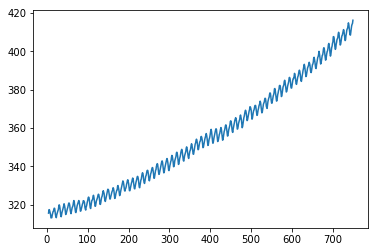

In [14]:
useful_data['CO2'].plot()

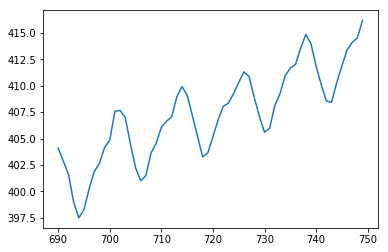

In [15]:
useful_data['CO2'][-60:].plot()

On voit de prime abord une augmentation globale, et des oscillations assez régulières avec des minima locaux les mois de Septembre / Octobre et des maxima locaux les mois de Mai et Juin.

Pour caractériser la croissance globale de la concentration de CO2 dans l'atmosphère, on va tenter de joindre au graphe des courbes de tendance linéaire et exponentielle, et voir quelle est la plus appropriée.

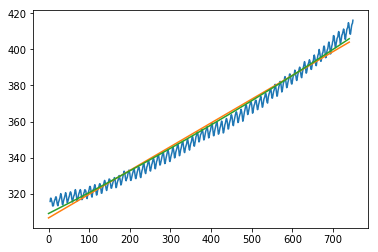

In [26]:
a1, b1 = np.polyfit([x for x in range(len(useful_data.index))], useful_data['CO2'], 1)
a2, b2 = np.polyfit([x for x in range(len(useful_data.index))], [np.log(y) for y in useful_data['CO2']], 1)
fit_data = [x*a1 + b1 for x in range(len(useful_data.index))]
fit_dataExp = [np.exp(b2)*np.exp(a2*x) for x in range(len(useful_data.index))]
useful_data['CO2'].plot()
plt.plot([x for x in range(len(useful_data.index))], fit_data)
plt.plot([x for x in range(len(useful_data.index))], fit_dataExp)

Ces courbes de tendance ne sont pas satisfaisantes, elles ne semblent pas adaptées aux données. On tente une courbe de tendance polynomiale de degré 2.

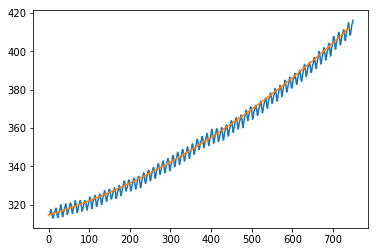

In [28]:
a3, b3, c3 = np.polyfit([x for x in range(len(useful_data.index))], useful_data['CO2'], 2)
fit_dataCarre = [x*x*a3 + b3*x + c3 for x in range(len(useful_data.index))]
useful_data['CO2'].plot()
plt.plot([x for x in range(len(useful_data.index))], fit_dataCarre)

Cette courbe de tendance a l'air plus à même de nous fournir des données moyennes correctes. On souhaite maintenant faire une extrapolation jusqu'en 2025. Plutôt que de donner des valeurs par mois, il est plus pertinent ici de donner des valeurs moyennées par années.
Pour ça, il suffit d'intégrer la fonction fit_dataCarre entre les bornes qui nous intéressent. 

In [35]:
#Valeur moyenne 2020
borne1 = useful_data['period'][-1:]
print(borne1)

749   2020-04
Name: period, dtype: object
